In [1]:
import torch

In [4]:
embeddings = torch.load('input/atac_dna_embeddings.torch').detach().cpu().numpy()

In [5]:
embeddings.shape

(116468, 768)

In [7]:
from umap import UMAP

In [8]:
umap = UMAP()

In [13]:
model = umap.fit(embeddings)

In [14]:
from matplotlib import pyplot as plt

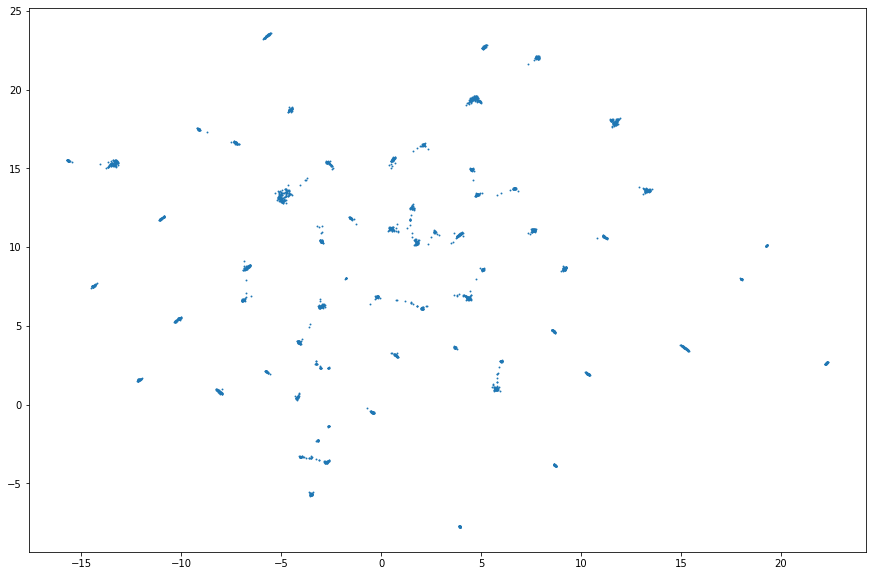

In [21]:
plt.figure(figsize=(15,10))
plt.scatter(proj[:,0], proj[:,1], s=.8)